# Sobel Edge Detection
By: Shawn Vosburg (260743167)  
Due: October 8th, 2018  
Class: ECSE 415, McGill University  
Assignment 1, sobel_edge.ipynb  


## Question 2.1 (Setup)
*Import necessary libraries and create the sharpen images (used later). *

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Create function to sharpen an image following forumla in assignment instructions
def sharpen(cleanImg, blurredImg):
    return 2*cleanImg - blurredImg

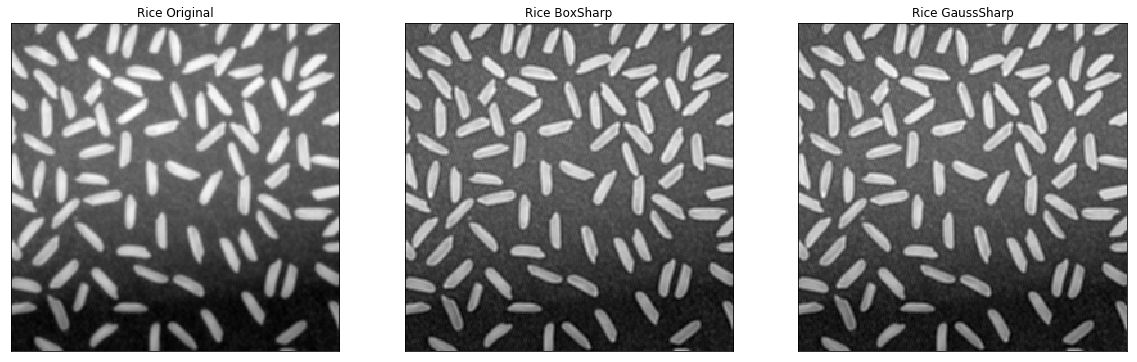

In [3]:
#Import rice image and create sharpened images
#Box sharpening
kernel = np.ones((5,5), np.float32)/(5*5)
rice = cv2.imread('rice.png',cv2.IMREAD_GRAYSCALE);
rice_BoxBlur = cv2.filter2D(rice, -1, kernel)
rice_box_sharp = sharpen(rice,rice_BoxBlur)

#Gaussian sharpening
rice = cv2.imread('rice.png',cv2.IMREAD_GRAYSCALE);
rice_GaussianBlur = cv2.GaussianBlur(rice,(5,5),sigmaX = 2, sigmaY = 2)
rice_gaussian_sharp = sharpen(rice,rice_GaussianBlur)

#Get Shape of rice
height, width = rice.shape

rice_plt = rice
rice_box_sharp_plt = rice_box_sharp
rice_gaussian_sharp_plt = rice_gaussian_sharp

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(rice_plt, cmap='gray')
plt.title("Rice Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(rice_box_sharp_plt,cmap='gray')
plt.title("Rice BoxSharp"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(rice_gaussian_sharp_plt,cmap='gray')
plt.title("Rice GaussSharp"), plt.xticks([]), plt.yticks([])
plt.show()

## Question 2.1-1
*Investigate the effects of sharpening prior to edge detection. Comment on the effectiveness of using sharpening prior to the edge
detection.*


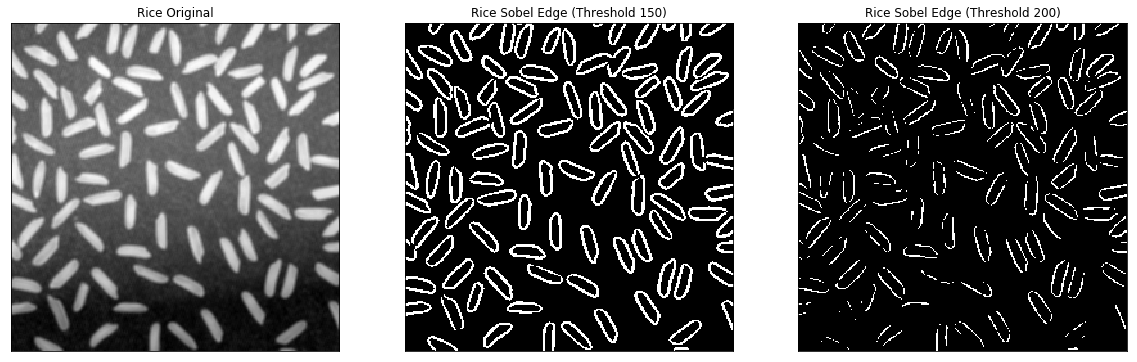

In [4]:
#Q2.1.1 Unsharpened images
#Set Thresholds
THRESH1 = 150
THRESH2 = 200
# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(rice, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(rice, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)
#create threshold images
ret, rice_thresh1 = cv2.threshold(I_m, THRESH1, 255, cv2.THRESH_BINARY)
ret1, rice_thresh2 = cv2.threshold(I_m, THRESH2, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(rice, cmap="gray")
plt.title("Rice Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(rice_thresh1, cmap="gray")
plt.title("Rice Sobel Edge (Threshold 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(rice_thresh2, cmap="gray")
plt.title("Rice Sobel Edge (Threshold 200)"), plt.xticks([]), plt.yticks([])

plt.show()

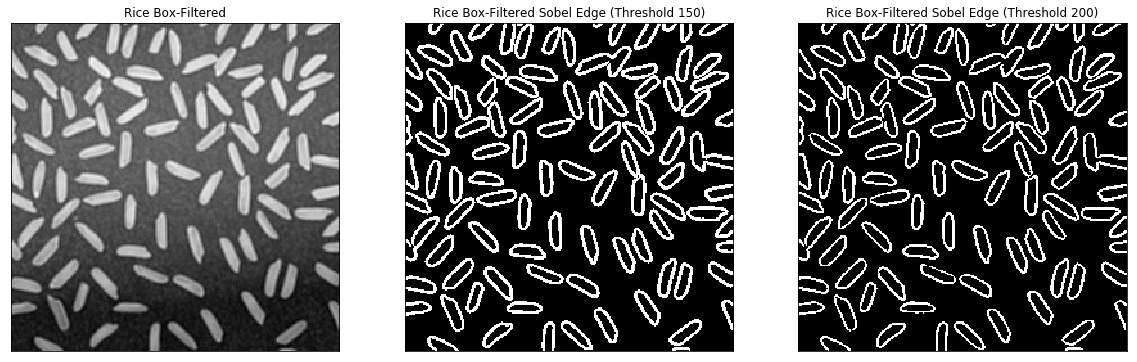

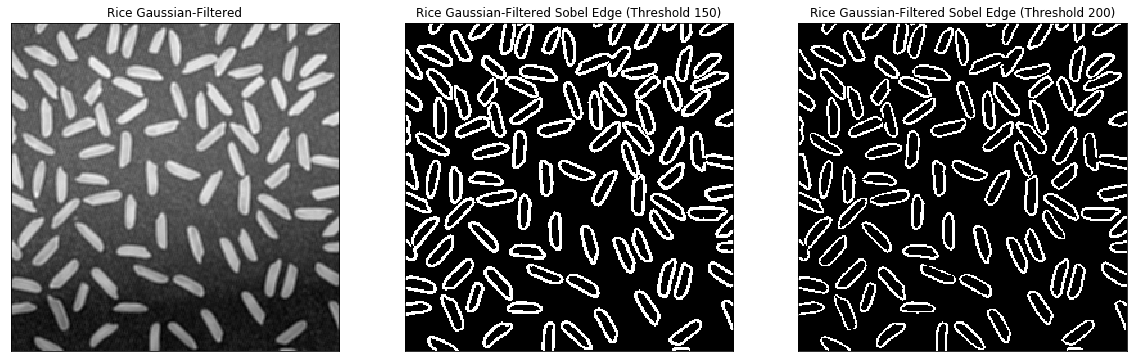

In [5]:
#Q2.1.1 Sharpened images
#Set Thresholds
THRESH1 = 150
THRESH2 = 200

#BOX_SHARPENED
# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(rice_box_sharp, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(rice_box_sharp, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)
#create threshold images
ret, riceBox_thresh1 = cv2.threshold(I_m, THRESH1, 255, cv2.THRESH_BINARY)
ret1, riceBox_thresh2 = cv2.threshold(I_m, THRESH2, 255, cv2.THRESH_BINARY)

#Gaussian-Sharpened
# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(rice_gaussian_sharp, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(rice_gaussian_sharp, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)
#create threshold images
ret, riceGaussian_thresh1 = cv2.threshold(I_m, THRESH1, 255, cv2.THRESH_BINARY)
ret1, riceGaussian_thresh2 = cv2.threshold(I_m, THRESH2, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(rice_box_sharp, cmap="gray")
plt.title("Rice Box-Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(riceBox_thresh1, cmap="gray")
plt.title("Rice Box-Filtered Sobel Edge (Threshold 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(riceBox_thresh2, cmap="gray")
plt.title("Rice Box-Filtered Sobel Edge (Threshold 200)"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(231), plt.imshow(rice_gaussian_sharp, cmap="gray")
plt.title("Rice Gaussian-Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(riceGaussian_thresh1, cmap="gray")
plt.title("Rice Gaussian-Filtered Sobel Edge (Threshold 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(riceGaussian_thresh2, cmap="gray")
plt.title("Rice Gaussian-Filtered Sobel Edge (Threshold 200)"), plt.xticks([]), plt.yticks([])

plt.show()


**Asnwer**: Sharpening of an image greatly improves edge detection in our case. For a threshold of 200, the edge detection did not completely find all grains of rice. A threshold of 200 is just too high for the unsharpened image. After sharpening, both for box and gaussian sharpeners, the Sobel Edge Detection could clearly find all the edges, even with a threshold of 200. This is due to the fact that edges are accentuated during sharpening. 


## Question 2.1-2 
*Investigate the effect of **denoising** prior to doing edge detection. • Comment on the effectiveness of using denoising prior to edge detection. *

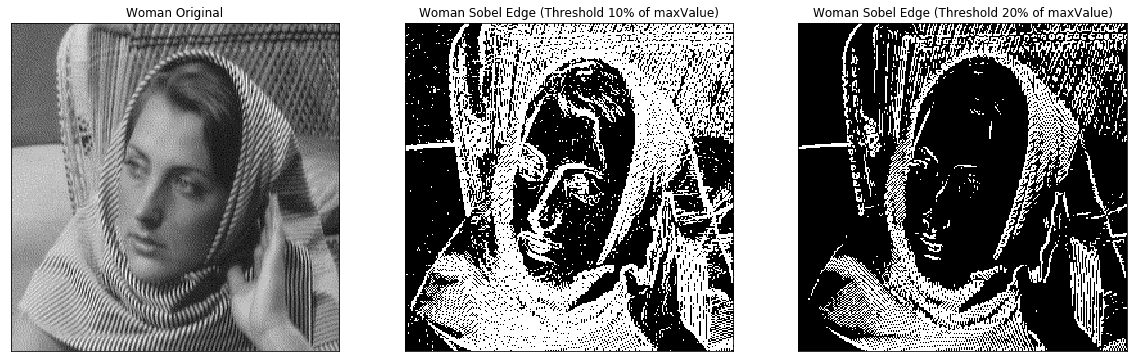

In [6]:
#Q2.1.2 Women with noise
#import women picture
women = cv2.imread('woman.png',cv2.IMREAD_GRAYSCALE);
# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(women, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(women, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)
#Set Thresholds
def maxValue(img):
    maxValue = 0.0
    h,w = img.shape
    for x in range(0,h):
        for y in range(0,w):
            maxValue = max(maxValue, img[y][x])
    return maxValue

THRESH1 = 0.1 * maxValue(I_m)
THRESH2 = 0.2 * maxValue(I_m)
#create threshold images
ret, women_thresh1 = cv2.threshold(I_m, THRESH1, 255, cv2.THRESH_BINARY)
ret1, women_thresh2 = cv2.threshold(I_m, THRESH2, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(women, cmap="gray")
plt.title("Woman Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(women_thresh1, cmap="gray")
plt.title("Woman Sobel Edge (Threshold 10% of maxValue)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(women_thresh2, cmap="gray")
plt.title("Woman Sobel Edge (Threshold 20% of maxValue)"), plt.xticks([]), plt.yticks([])

plt.show()

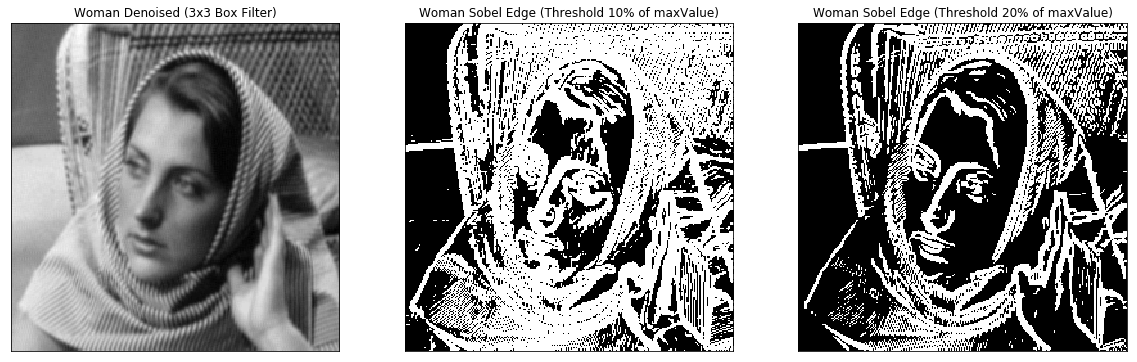

In [8]:
#Q2.1.2 Women denoised
#import women picture
kernel = np.ones((3,3), np.float32)/(3*3)
women = cv2.imread('woman.png',cv2.IMREAD_GRAYSCALE);
womenDenoised =cv2.filter2D(women, -1, kernel)
# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(womenDenoised, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(womenDenoised, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)
#Set Thresholds
def maxValue(img):
    maxValue = 0.0
    h,w = img.shape
    for x in range(0,h):
        for y in range(0,w):
            maxValue = max(maxValue, img[x][y])
    return maxValue

THRESH1 = 0.1 * maxValue(I_m)
THRESH2 = 0.2 * maxValue(I_m)
#create threshold images
ret, women_thresh1 = cv2.threshold(I_m, THRESH1, 255, cv2.THRESH_BINARY)
ret1, women_thresh2 = cv2.threshold(I_m, THRESH2, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(womenDenoised, cmap="gray")
plt.title("Woman Denoised (3x3 Box Filter)"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(women_thresh1, cmap="gray")
plt.title("Woman Sobel Edge (Threshold 10% of maxValue)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(women_thresh2, cmap="gray")
plt.title("Woman Sobel Edge (Threshold 20% of maxValue)"), plt.xticks([]), plt.yticks([])
plt.show()


**Answer**: Denoising clearly helps with edge detection as shown above. The threshold for edge detection can be set higher after the image has been denoised. The reasoning behind how this works is that high frequency noise interacts with the Sobel Operator in such a way that it emulates sharp edges. A bright pixel caused by noise will be detected as an edge using Sobel. By smoothing out the noise before apply edge detection, the probability of a false edge positive is greatly reduced. 